# Import data


In [122]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import math

In [123]:
import pandas as pd
df=pd.read_csv('/Users/xiaoxuchen/Downloads/DS_interview/DS_project/Python_scrap/final_condo_data.csv',index_col=[0])
df.head()

,MLS_number_condo,condo_price,maint_fee,avg_income_household_yr,avg_income_individual_yr,total_sqft,price_per_sqft,street,toronto_region,bedrooms,...,tenancy_property_type_low_rise,tenancy_property_type_high_rise,household_compo_singlefamily,household_compo_multifamily,household_compo_singleperson,household_compo_multiperson,brokerages,single_condo_url,latitude,longitude
0,C5608721,980000,$647.31,125204,64764,700 - 799 sqft,"$1,227 - $1,400",4708 - 125 Blue Jays Way,Downtown,2,...,1,98,29%,0%,59%,12%,"AIMHOME NEW TIMES REALTY,",https://condos.ca/toronto/king-blue-115-125-bl...,43.645941,-79.392054
1,C5608680,699800,$657.88,67850,29821,NaN,$813,1103 - 62 Forest Manor Rd,North York,2,...,0,92,61%,2%,27%,10%,"RIGHT AT HOME REALTY,",https://condos.ca/toronto/dream-tower-at-emera...,43.773944,-79.345246
2,C5608587,960000,$832.53,142425,63489,NaN,"$1,061",2008 - 35 Balmuto St,Downtown,2+1,...,3,96,33%,0%,54%,12%,"ROYAL LEPAGE GOLDEN RIDGE REALTY,",https://condos.ca/toronto/uptown-residences-35...,43.669472,-79.387488
3,C5608686,698800,$344.65,108578,60024,NaN,"$1,099",1111 - 111 Bathurst St,Downtown,1,...,15,76,35%,1%,56%,9%,"RE/MAX HALLMARK REALTY LTD.,",https://condos.ca/toronto/oneeleven-condos-111...,43.645108,-79.402790
4,W5608672,389900,$569.67,62102,27414,800 - 899 sqft,$434 - $487,2502 330 Dixon Rd,Etobicoke,2,...,0,90,66%,4%,23%,7%,"RE/MAX WEST REALTY INC.,",https://condos.ca/toronto/320-dixon-condos-320...,43.695785,-79.553155


# 1.Preliminary data cleaning before split dataset

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3160 entries, 0 to 3159
Data columns (total 49 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   MLS_number_condo                     3160 non-null   object 
 1   condo_price                          3160 non-null   int64  
 2   maint_fee                            3031 non-null   object 
 3   avg_income_household_yr              3160 non-null   int64  
 4   avg_income_individual_yr             3160 non-null   int64  
 5   total_sqft                           876 non-null    object 
 6   price_per_sqft                       3068 non-null   object 
 7   street                               3160 non-null   object 
 8   toronto_region                       3143 non-null   object 
 9   bedrooms                             3160 non-null   object 
 10  bath                                 3160 non-null   int64  
 11  parking                       

In [125]:
df.describe()

,condo_price,avg_income_household_yr,avg_income_individual_yr,bath,parking,near_by_schools,speak_English,speak_Europe_language,speak_Asian_language,speak_Africa_language,...,population_65_and_more,tenancy_property_type_owned,tenancy_property_type_rented,tenancy_property_type_detached,tenancy_property_type_semi_detached,tenancy_property_type_duplex,tenancy_property_type_low_rise,tenancy_property_type_high_rise,latitude,longitude
count,3.160000e+03,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,3144.000000,3160.000000,3160.000000,3160.000000,...,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000
mean,1.003836e+06,108823.673418,50159.051582,1.734177,0.915823,1.000633,52.518448,9.143987,18.060443,0.369304,...,13.298101,51.336076,48.038608,8.213924,2.458544,1.711076,9.269937,72.622468,43.694582,-79.395635
std,1.047225e+06,53354.910937,21669.760622,0.850434,0.642390,1.255315,16.608162,8.274139,16.226275,2.558342,...,7.126212,18.088726,18.289755,14.017393,5.348878,3.001804,12.300922,28.589444,0.056645,0.077609
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.593453,-79.620766
25%,6.589500e+05,75478.250000,33660.000000,1.000000,1.000000,0.000000,39.000000,4.000000,6.000000,0.000000,...,9.000000,37.000000,34.000000,0.000000,0.000000,0.000000,1.000000,59.000000,43.646427,-79.420455
50%,7.888880e+05,97563.500000,47095.000000,2.000000,1.000000,1.000000,56.000000,8.000000,12.000000,0.000000,...,12.000000,51.000000,49.000000,2.000000,0.000000,1.000000,4.000000,84.000000,43.670577,-79.391671
75%,9.988250e+05,122321.000000,60140.000000,2.000000,1.000000,1.000000,65.000000,11.000000,26.000000,0.000000,...,16.000000,65.000000,63.000000,10.000000,2.000000,2.000000,12.000000,95.000000,43.749918,-79.369282
max,3.470000e+07,631792.000000,241765.000000,11.000000,4.000000,7.000000,90.000000,57.000000,76.000000,26.000000,...,58.000000,97.000000,92.000000,100.000000,55.000000,27.000000,80.000000,100.000000,43.825977,-79.135396


## 1.1 remove characters from numeric columns

`only clean the text/characters for numeric columns on the whole dataset before split, in order to avoid data leakage, and then do the data cleaning(imputation, remove outliers if possible) on the training set, so that model will be more close to practical use in the real world and then can be in production`

In [126]:
def clean_useless_text(col,text):
    return df[col].str.replace(text,'',regex=True)
    
df['maint_fee'] = clean_useless_text('maint_fee',',')
df['maint_fee'] = clean_useless_text('maint_fee','$')
df['total_sqft'] = clean_useless_text('total_sqft','sqft')
df['total_sqft'] = clean_useless_text('total_sqft','+')
df['price_per_sqft'] = clean_useless_text('price_per_sqft','$')
df['price_per_sqft'] = clean_useless_text('price_per_sqft',',')
df['age_of_building'] = clean_useless_text('age_of_building','years old')
df['age_of_building'] = clean_useless_text('age_of_building','+')
df['near_by_grocery_stores'] = clean_useless_text('near_by_grocery_stores','stores')
df['near_by_bars&restaurants'] = clean_useless_text('near_by_bars&restaurants','& Restaurants')


## 1.2 remove percent sign from numeric columns

In [127]:
def remove_percent(columns):
    new_list=[]
    for i in columns:
        i=i.strip('%')
        new_list.append(i)
    return new_list
    
df.commute_transit=remove_percent(df.commute_transit)
df.commute_car=remove_percent(df.commute_car)
df.household_compo_singlefamily = remove_percent(df.household_compo_singlefamily)
df.household_compo_multifamily = remove_percent(df.household_compo_multifamily)
df.household_compo_singleperson = remove_percent(df.household_compo_singleperson)
df.household_compo_multiperson = remove_percent(df.household_compo_multiperson)

## 1.3 create new attribute

In [128]:
# replace 'studio' to 1 bedrooms
df.bedrooms=df.bedrooms.str.replace('Studio','1',regex=True)

### 1.3.1 separate bedrooms plus field to a new column called bedrooms_plus_field

In [129]:
def bedrooms_plus_field(columns):
    bedrooms_plus_field = []
    for i in columns:
        if '+' in i:
            i=i.split('+')[1]
        else:
            i=0
        bedrooms_plus_field.append(i)
    return bedrooms_plus_field
df['bedrooms_plus_field']=bedrooms_plus_field(df.bedrooms)

### 1.3.2 split bedrooms parts before plus sign into current df.bedrooms column

In [130]:
def split_bedrooms(columns):
    new_list=[]
    for i in df.bedrooms:
        if '+' in i:
            i=i.split('+')[0]
        new_list.append(i)
    return new_list
df.bedrooms=split_bedrooms(df.bedrooms)

## 1.4 change_from_valuerange_to_value

### 1.4.1 total_sqft

In [131]:
df['total_sqft'] = df['total_sqft'].replace(np.nan,'0 - 0',regex=True) #change nan to 0-0
df['total_sqft'] = df['total_sqft'].str.replace('0 - 499','499',regex=True) #change range to specific value

# change single value to value range with hyphen
def change_from_valuerange_to_value(dataframe_column_name):
    test=[]
    for i in dataframe_column_name:    
        if '-' not in i: 
            i=str(i)+'- '+str(i)
        test.append(i)
    dataframe_column_name= test # give new list to column

    #calculate average value to replace range to specific avg value
    list_1 = []
    list_2=[]
    for i in dataframe_column_name:    
        if '-' in i:       
            split_list=[int(y) for y in i.split('-')]
            list_1.append(split_list)
    for j in list_1:
        list_2.append(sum(j)/len(j))
    dataframe_column_name=list_2 # give new list to column
    return dataframe_column_name

In [132]:
df.total_sqft=change_from_valuerange_to_value(df.total_sqft)

### 1.4.2 price_per_sqft

In [133]:
df.price_per_sqft=df.price_per_sqft.replace(np.nan,0,regex=True) #fillin nan with 0
df.price_per_sqft=change_from_valuerange_to_value(df.price_per_sqft.astype(str))

# 2.Convert data type 

In [134]:
# in order to replace float to int, needs to fillin nan with 0
df.speak_English=df.speak_English.replace(np.nan,0,regex=True) 

In [135]:
convert_dict = {'maint_fee':float,
                'bedrooms':int,
               'commute_transit': int,
               'commute_car': int,
               'near_by_grocery_stores': int,
               'near_by_bars&restaurants':int,
               'speak_English':int,
               'household_compo_singlefamily':int,
               'household_compo_multifamily':int,
               'household_compo_singleperson':int,
               'household_compo_multiperson':int,
               'bedrooms_plus_field':int,
                }
  
df = df.astype(convert_dict)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3160 entries, 0 to 3159
Data columns (total 50 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   MLS_number_condo                     3160 non-null   object 
 1   condo_price                          3160 non-null   int64  
 2   maint_fee                            3031 non-null   float64
 3   avg_income_household_yr              3160 non-null   int64  
 4   avg_income_individual_yr             3160 non-null   int64  
 5   total_sqft                           3160 non-null   float64
 6   price_per_sqft                       3160 non-null   float64
 7   street                               3160 non-null   object 
 8   toronto_region                       3143 non-null   object 
 9   bedrooms                             3160 non-null   int64  
 10  bath                                 3160 non-null   int64  
 11  parking                       

# 3.Preparation before stratified shuffle split


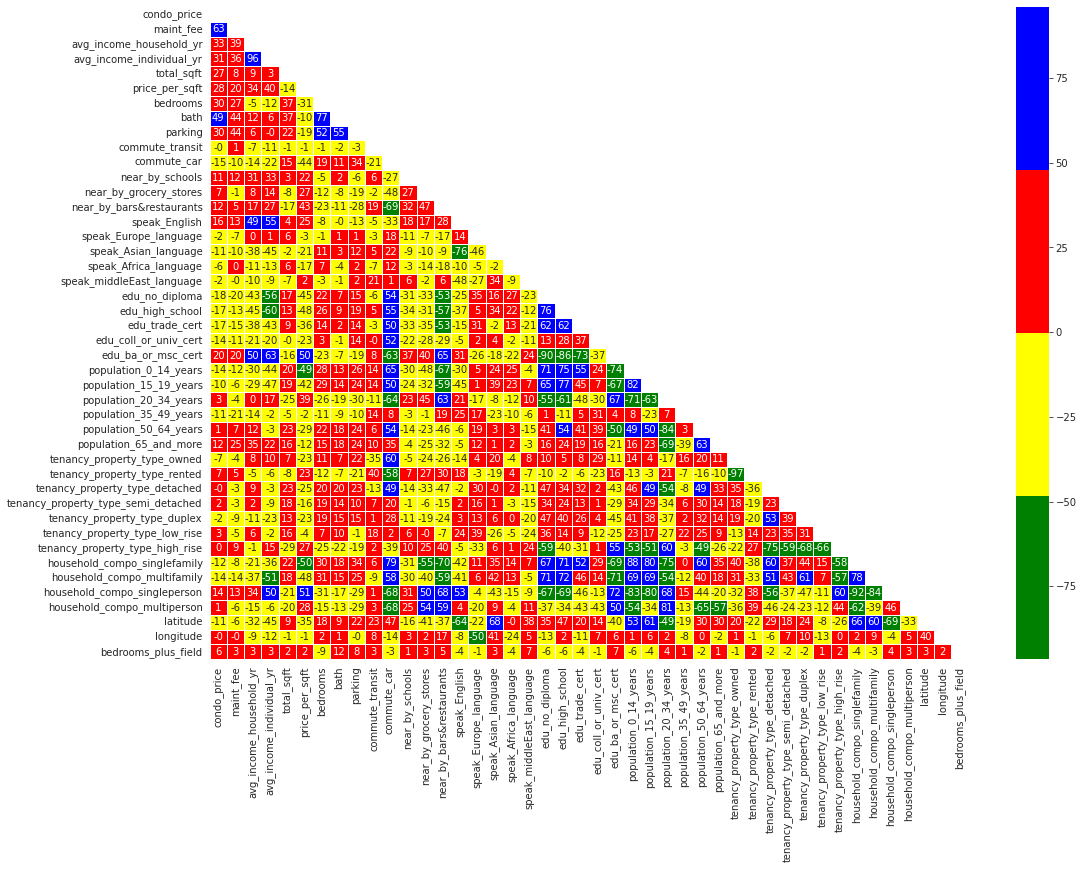

In [137]:
mask=np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(17,12))
with sns.axes_style("white"):
    ax = sns.heatmap(df.corr()*100, mask=mask, fmt='.0f', annot=True, lw=1, cmap=ListedColormap(['green', 'yellow', 'red','blue']))


from heatmap, except the maint_fee and bath, average incomer per household per year is the most important attribute to predict housing prices, therefore a new income category attribute will be created for stratified shuffle split

`in order to use income household per year as straified split parameter, needs to make sure no Nan or zero values, after checked only 7 condos have income=0, then use same region and same bedrooms, also within price_per_sqft range 200 to fillin income, also at the same time fillin region with specific goole search to make sure below built function working  `

In [138]:
#change nan to str first to avoid float issue
df.toronto_region=df.toronto_region.replace(np.nan,'nothing',regex=True)

fill in region based on specific string in street

In [139]:
def fillin_na_region(strings_in_street,region_name):
    df.loc[((df.street.str.contains(strings_in_street)) & (df.toronto_region=='nothing')),'toronto_region']=region_name
fillin_na_region('Merchant','Downtown')
fillin_na_region('Lawrence','North York')
fillin_na_region('Redpath','Midtown | Central')
fillin_na_region('Peter & Adelaide','Downtown')
fillin_na_region('Vicora Linkway','East York')
fillin_na_region('Forest','North York')

fillin average income==0 to make stratified split works

In [140]:
def zero_income(idx,col):
        return math.ceil(df[(df[col]!=0)&(df.toronto_region==df.toronto_region.iloc[idx])&(df.bedrooms==df.bedrooms.iloc[idx])&(df.price_per_sqft<df.price_per_sqft.iloc[idx]+200)&(df.price_per_sqft>df.price_per_sqft.iloc[idx]-200)][col].astype(float).mean())

In [141]:
def fillin_income_specific_condo(number,col):
    df.loc[((df.MLS_number_condo=='_c209') & (df[col]==0)),col]=number
fillin_income_specific_condo(125031,'avg_income_household_yr')
fillin_income_specific_condo(57974,'avg_income_individual_yr')

In [142]:
def replace_zero_income(col):
    list_value_toreplace_zero_value=[]  
    # add zero income indexes to a_list
    a_list_avg_income=df[df[col]==0].index.values.tolist() 

    for i in a_list_avg_income:
        list_value_toreplace_zero_value.append(zero_income(i,col))
    list_value_toreplace_zero_value

    # zip_list
    zip_list_idx_val = dict(zip(a_list_avg_income,list_value_toreplace_zero_value))
    # replace zero income with new values
    new_values_to_replace_zero_income = []
    for index,value in df[col].items():
        if value==0:
            value=zip_list_idx_val[index]
        else:
            value=value
        new_values_to_replace_zero_income.append(value)
    return new_values_to_replace_zero_income
df.avg_income_household_yr=replace_zero_income('avg_income_household_yr')
df.avg_income_individual_yr=replace_zero_income('avg_income_individual_yr')

In [143]:
#divide household_income_category into 5 parts
df['household_income_category']=pd.cut(df['avg_income_household_yr']/100000,bins=[0,1,2,3,4,5,np.inf],labels=[1,2,3,4,5,6])
df['household_income_category'].value_counts()

1    1714
2    1262
3     134
4      43
5       4
6       3
Name: household_income_category, dtype: int64

<AxesSubplot:>

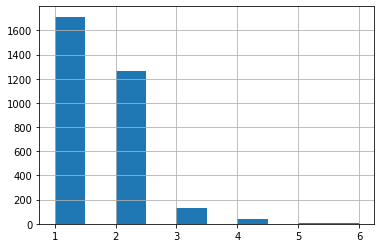

In [144]:
df['household_income_category'].hist()

fillin 18 condo_price==0 by specific google search

In [145]:
def fillin_na_total_price(condo_unique_number,total_price):
    df.loc[((df.MLS_number_condo==condo_unique_number) & (df.condo_price==0)),'condo_price']=total_price
fillin_na_total_price('W5589156',1095000)
fillin_na_total_price('C5583978',959000)
fillin_na_total_price('W5582563',630000)
fillin_na_total_price('C5581534',819000)
fillin_na_total_price('W5582733',380000)
fillin_na_total_price('C5579484',728000)
fillin_na_total_price('C5577283',799900)
fillin_na_total_price('C5575472',619000)
fillin_na_total_price('W5573807',759800)
fillin_na_total_price('C5572158',814900)
fillin_na_total_price('C5571008',499800)
fillin_na_total_price('C5568550',700000)
fillin_na_total_price('W5544401',790000)
fillin_na_total_price('W5520065',549900)
fillin_na_total_price('C5513290',1099000)
fillin_na_total_price('C5509454',8895000)
fillin_na_total_price('C5510226',949000)
fillin_na_total_price('W5448166',79000)

fillin price per sqft=0 when condo_price<>0, total_sqft<>0, by condo_price/total_sqft

In [146]:
df.price_per_sqft=np.where(((df.condo_price!=0)&(df.total_sqft!=0)&(df.price_per_sqft==0)),df.condo_price/df.total_sqft,df.price_per_sqft)


fillin price per sqft==0 when total_sqft==0, fill correct value from search

In [147]:
def fillin_na_price_per_sqft(condo_unique_number,price_per_sqft):
    df.loc[((df.MLS_number_condo==condo_unique_number) & (df.price_per_sqft==0)),'price_per_sqft']=price_per_sqft
fillin_na_price_per_sqft( 'W5608127',1036.93181818182)
fillin_na_price_per_sqft( 'E5608449',342.307692307692)
fillin_na_price_per_sqft( 'E5606533',786.308973172988)
fillin_na_price_per_sqft( 'E5607925',331.432405233143)
fillin_na_price_per_sqft( 'E5608086',462.439024390244)
fillin_na_price_per_sqft( 'E5604650',449.944)
fillin_na_price_per_sqft( 'W5604826',613.846153846154)
fillin_na_price_per_sqft( 'W5605585',2333.16666666667)
fillin_na_price_per_sqft( 'C5604537',660.444444444444)
fillin_na_price_per_sqft( 'C5603543',1097.5)
fillin_na_price_per_sqft( 'C5602764',1133.04252998909)
fillin_na_price_per_sqft( 'E5603445',558.674242424242)
fillin_na_price_per_sqft( 'C5603462',832.777777777778)
fillin_na_price_per_sqft( 'W5602932',2237.31343283582)
fillin_na_price_per_sqft( 'W5603745',1071.20980091884)
fillin_na_price_per_sqft( 'W5602437',1090.30303030303)
fillin_na_price_per_sqft( 'E5601180',1100.84745762712)
fillin_na_price_per_sqft( 'E5600998',504.090909090909)
fillin_na_price_per_sqft( 'E5600205',659.5)
fillin_na_price_per_sqft( 'W5599186',930.38570084666)
fillin_na_price_per_sqft( 'W5600454',701.665459811731)
fillin_na_price_per_sqft( 'E5597015',587.764866712235)
fillin_na_price_per_sqft( 'W5596341',960.231813773036)
fillin_na_price_per_sqft( 'C5594666',1216.39175257732)
fillin_na_price_per_sqft( 'E5596175',635.508849557522)
fillin_na_price_per_sqft( 'C5593660',699.186991869919)
fillin_na_price_per_sqft( 'C5593347',2630.73005093379)
fillin_na_price_per_sqft( 'W5592577',479.122055674518)
fillin_na_price_per_sqft( 'W5591552',1159.97679814385)
fillin_na_price_per_sqft( 'E5591453',461.45251396648)
fillin_na_price_per_sqft( 'W5589178',1333.73786407767)
fillin_na_price_per_sqft( 'E5587637',383.511269276394)
fillin_na_price_per_sqft( 'C5588027',733.007552199023)
fillin_na_price_per_sqft( 'E5586098',796.875)
fillin_na_price_per_sqft( 'C5590498',891.946992864424)
fillin_na_price_per_sqft( 'W5587002',397.348484848485)
fillin_na_price_per_sqft( 'W5583487',1063.89776357827)
fillin_na_price_per_sqft( 'C5583091',1399.69450101833)
fillin_na_price_per_sqft( 'C5582449',2241.66666666667)
fillin_na_price_per_sqft( 'E5580283',385.865894838398)
fillin_na_price_per_sqft( 'C5578937',1114.74164133739)
fillin_na_price_per_sqft( 'C5576910',1498.51924975321)
fillin_na_price_per_sqft( 'C5572873',592.796610169491)
fillin_na_price_per_sqft( 'C5568779',1158)
fillin_na_price_per_sqft( 'C5559401',759)
fillin_na_price_per_sqft( 'W5556044',770.779777206512)
fillin_na_price_per_sqft( 'C5554065',2297.70114942529)
fillin_na_price_per_sqft( 'E5552402',499.95)
fillin_na_price_per_sqft( 'C5549649',1084.23686405338)
fillin_na_price_per_sqft( 'E5546398',876.219054763691)
fillin_na_price_per_sqft( 'C5545996',2175.55555555556)
fillin_na_price_per_sqft( 'W5543998',526.933333333333)
fillin_na_price_per_sqft( 'C5543390',3771.18644067797)
fillin_na_price_per_sqft( 'C5542103',1581.66494512589)
fillin_na_price_per_sqft( 'C5537332',1500)
fillin_na_price_per_sqft( 'E5530963',1070.70166041778)
fillin_na_price_per_sqft( 'C5520778',797.05654531371)
fillin_na_price_per_sqft( 'C5514519',913.35857220119)
fillin_na_price_per_sqft( 'W5480989',832.777777777778)
fillin_na_price_per_sqft( 'C5468435',1097.21955896453)
fillin_na_price_per_sqft( 'C4499434',1000)


fillin total sqft==0 when price_per_sqft<>0, condo_price<>0 by condo_price/price_per_sqft

In [148]:
df.total_sqft=np.where(((df.total_sqft==0)&(df.condo_price!=0)&(df.price_per_sqft!=0) ),df.condo_price/df.price_per_sqft ,df.total_sqft)

In [149]:
df.total_sqft=df.total_sqft.astype(int)
df.price_per_sqft=df.price_per_sqft.astype(int)

replace text in age_of_building

In [150]:
df.age_of_building = df.age_of_building.str.replace('New','0.5',regex=True)
df.age_of_building = df.age_of_building.str.replace('0-5','2.5',regex=True)
df.age_of_building = df.age_of_building.str.replace('31-50','40.5',regex=True)
df.age_of_building = df.age_of_building.str.replace('6-15','10.5',regex=True)
df.age_of_building = df.age_of_building.str.replace('16-30','23.0',regex=True)
df.age_of_building = df.age_of_building.str.replace('51-99','75.0',regex=True)
df.age_of_building = df.age_of_building.str.replace('6-10','8.0',regex=True)
df.age_of_building = df.age_of_building.str.replace('11-15','13.0',regex=True)

 Removing Outliers

## 3.1 condo_price

<AxesSubplot:xlabel='condo_price'>

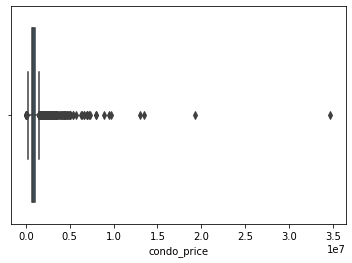

In [151]:
sns.boxplot(x=df.condo_price)

`remove outliers from condo_price when condo_price>13,500,000 or <100,000`

In [152]:
df=df[(df.condo_price<13500000) & (df.condo_price>100000)]
df.shape

(3151, 51)

## 3.2 nearby,plus_field,total_sqft

` 2 condos have outliers for bedrooms_plus_field, will remove `
* near by looks good
* total_sqft start to become discrete if they are more than 2000 sqft

<AxesSubplot:xlabel='total_sqft'>

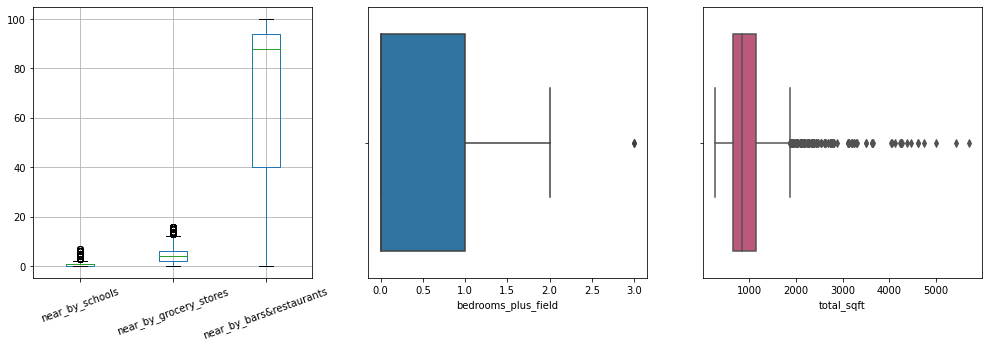

In [153]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(17,5))

df.boxplot(['near_by_schools' ,'near_by_grocery_stores','near_by_bars&restaurants'], figsize=(7,  5), ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=20)
sns.boxplot(x=df.bedrooms_plus_field, ax=ax2)
sns.boxplot(x=df.total_sqft, ax=ax3 , palette='plasma')


## 3.3 age_of_building,price_per_sqft,bath

* age_of_building have 8 condos more than 100 years, so keep it 

` delete 2 condos which have price_per_sqft>3000
 delete 1 condo which have bath>8 `

<AxesSubplot:xlabel='bath'>

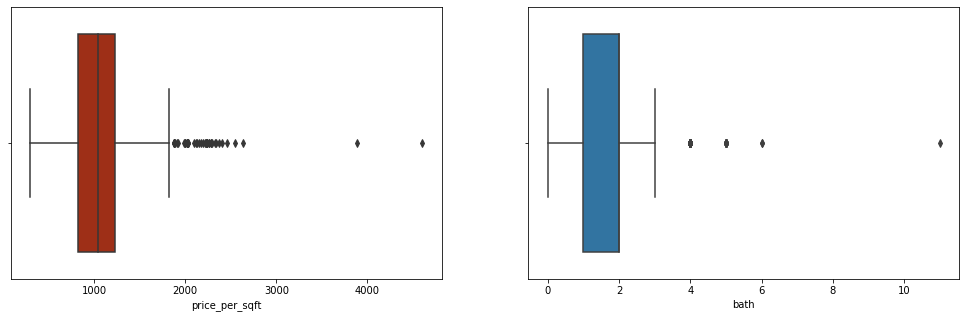

In [154]:
fig, ( ax2, ax3) = plt.subplots(1,2,figsize=(17,5))

# sns.boxplot(x=df.age_of_building, ax=ax1, palette="prism")
sns.boxplot(x=df.price_per_sqft, ax=ax2, palette="gnuplot")
sns.boxplot(x=df.bath, ax=ax3)

### delete outliers from price_per_sqft, bath, bedrooms_plus_field 

In [155]:
df=df[(df.bath<=8) & (df.price_per_sqft<=3000) & (df.bedrooms_plus_field<=2)]
df.shape

(3147, 51)

In [156]:
convert_dict = {'bedrooms': int,
               'bath': int,
               'parking': int,
                } 
df = df.astype(convert_dict)

### remove outliers for bedroom>6

In [157]:
df=df[df.bedrooms<6]
df.shape

(3145, 51)

## 3.4 language,education,population

[Text(1, 0, 'population_0_14_years'),
 Text(2, 0, 'population_15_19_years'),
 Text(3, 0, 'population_20_34_years'),
 Text(4, 0, 'population_35_49_years'),
 Text(5, 0, 'population_50_64_years'),
 Text(6, 0, 'population_65_and_more')]

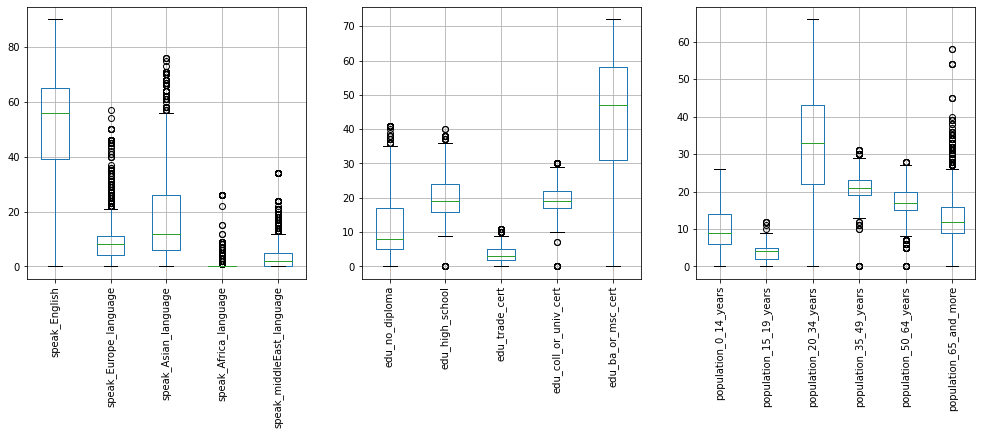

In [158]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(17,5))

df.boxplot(['speak_English' ,'speak_Europe_language','speak_Asian_language','speak_Africa_language','speak_middleEast_language'], figsize=(7,  5), ax=ax1)
df.boxplot(['edu_no_diploma' ,'edu_high_school','edu_trade_cert','edu_coll_or_univ_cert','edu_ba_or_msc_cert'], figsize=(7,  5), ax=ax2)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
df.boxplot(['population_0_14_years' ,'population_15_19_years','population_20_34_years','population_35_49_years','population_50_64_years','population_65_and_more'], figsize=(7,  5), ax=ax3)
ax3.set_xticklabels(ax3.get_xticklabels(),rotation=90)

## 3.5 property_type, household, maint_fee

<AxesSubplot:xlabel='maint_fee'>

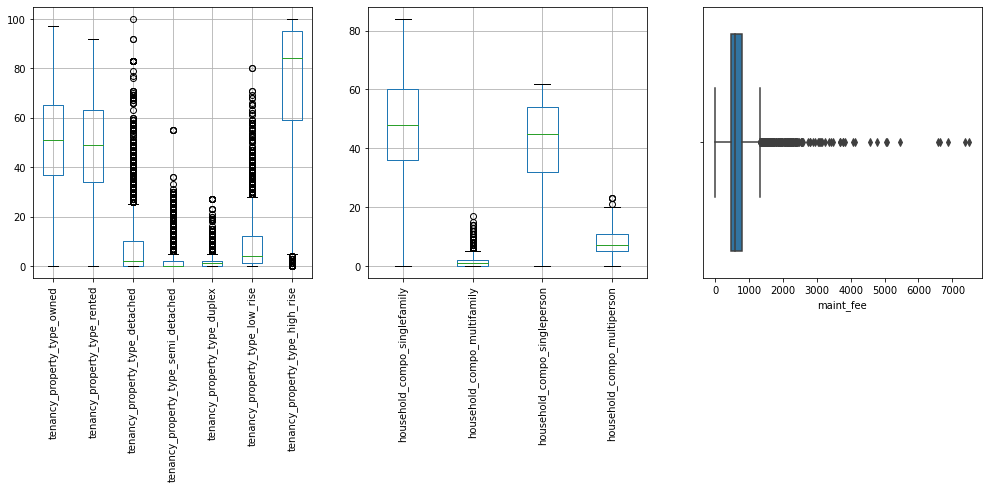

In [159]:
fig, (ax4, ax5, ax6) = plt.subplots(1,3,figsize=(17,5))
df.boxplot(['tenancy_property_type_owned' ,'tenancy_property_type_rented','tenancy_property_type_detached','tenancy_property_type_semi_detached','tenancy_property_type_duplex','tenancy_property_type_low_rise','tenancy_property_type_high_rise'], figsize=(7,  5), ax=ax4)
df.boxplot(['household_compo_singlefamily' ,'household_compo_multifamily','household_compo_singleperson','household_compo_multiperson'], figsize=(7,  5), ax=ax5)
ax4.set_xticklabels(ax4.get_xticklabels(),rotation=90)
ax5.set_xticklabels(ax5.get_xticklabels(),rotation=90)
sns.boxplot(x=df.maint_fee, ax=ax6)

## 3.6 income outlier

<AxesSubplot:xlabel='avg_income_household_yr'>

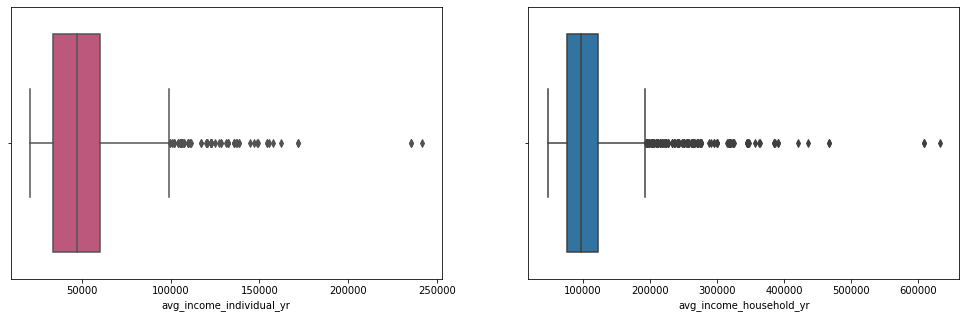

In [160]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(17,5))
sns.boxplot(x=df.avg_income_individual_yr, ax=ax1,palette='plasma')
sns.boxplot(x=df.avg_income_household_yr, ax=ax2)

`remove 3 outliers when average income >500000`

In [161]:
df=df[df.avg_income_household_yr<=500000]
df.shape

(3142, 51)

`Conclusion: after remove all outliers, the dataset shape changes from 3160 to 3142`

# 4.StratifiedShuffleSplit

after stratified shuffle split, each type of income from test_set is distributed equally as the whole dataset, therefore it avoids the skewed dataset problem

In [162]:
# reset index before shuffle to avoid index mistake
df=df.reset_index(drop=True)

In [163]:
# from sklearn.model_selection import StratifiedShuffleSplit
# split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
# for train_index, test_index in split.split(df,df['household_income_category']):
#     strat_train_set = df.loc[train_index]
#     strat_test_set = df.loc[test_index]

In [164]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, df['condo_price'], test_size=0.2, 
                                                    shuffle=True, random_state=42,
                                stratify = df['household_income_category'])

to make a comparison with random shuffle split, the result shows as below

In [165]:
def income_cat_proportions(data):
    return data['household_income_category'].value_counts()/len(data)

train_set,test_set=train_test_split(df,test_size=0.2,random_state=42)

compare_props=pd.DataFrame({
    'Overall':income_cat_proportions(df),
    'Stratified':income_cat_proportions(x_test),
    'Random':income_cat_proportions(test_set),
}).sort_index()
compare_props['Rand.%error']=100*compare_props['Random']/compare_props['Overall']-100
compare_props['Strat.%error']=100*compare_props['Stratified']/compare_props['Overall']-100
compare_props

,Overall,Stratified,Random,Rand.%error,Strat.%error
1,0.543603,0.543720,0.586645,7.918037,0.021595
2,0.399427,0.399046,0.360890,-9.648022,-0.095390
3,0.042330,0.042925,0.033386,-21.127939,1.406935
4,0.013367,0.012719,0.017488,30.827466,-4.852752
5,0.001273,0.001590,0.001590,24.880763,24.880763
6,0.000000,0.000000,0.000000,NaN,NaN


it clearly shows from above table that using stratified shuffle split has small error compared with random shuffle split. therefore, use stratified train set as the final train set and drop the 'household_income_category' in dataset to avoid overfitting

<font color='red'>from here to below, the variable df has changed to stratified training set</font>

In [166]:
for i in (x_train,x_test):
    i.drop('household_income_category',axis=1,inplace=True)
df = x_train.copy()

# 5.Discover and Visualize the Data to Gain Insights

## 5.1 Visualizing Geographical Data

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

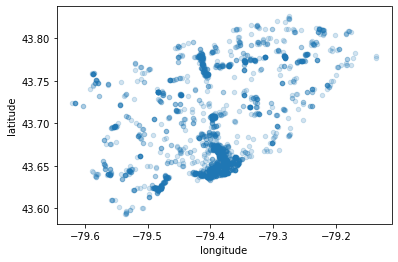

In [167]:
df.plot(kind='scatter',x='longitude',y='latitude',alpha=0.2)

## 5.2 Correlations

In [168]:
df.corr()['condo_price'].sort_values(ascending=False)

condo_price                            1.000000
maint_fee                              0.775293
total_sqft                             0.768482
bath                                   0.517979
price_per_sqft                         0.437224
avg_income_household_yr                0.434820
avg_income_individual_yr               0.403845
parking                                0.354570
bedrooms                               0.297139
edu_ba_or_msc_cert                     0.263195
speak_English                          0.204345
household_compo_singleperson           0.177038
near_by_schools                        0.174063
near_by_bars&restaurants               0.154083
population_65_and_more                 0.143155
near_by_grocery_stores                 0.082411
tenancy_property_type_rented           0.080367
tenancy_property_type_low_rise         0.045546
bedrooms_plus_field                    0.045080
population_20_34_years                 0.035794
tenancy_property_type_semi_detached    0

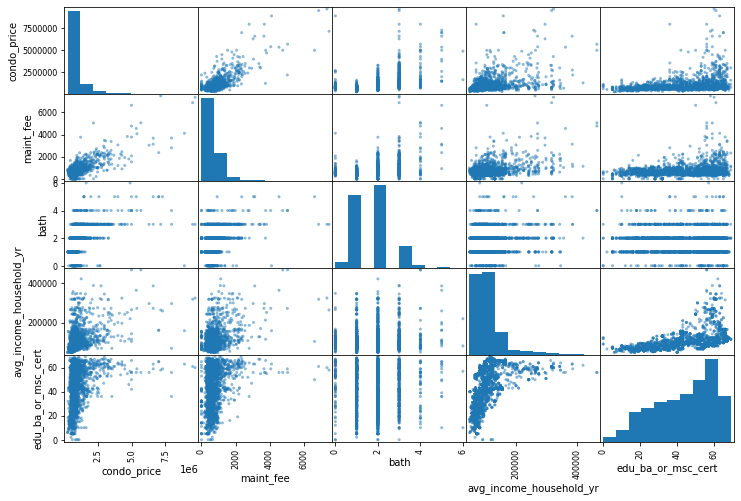

In [169]:
from pandas.plotting import scatter_matrix
attributes=["condo_price", "maint_fee", "bath","avg_income_household_yr","edu_ba_or_msc_cert"]
scatter_matrix(df[attributes],figsize=(12,8))
plt.show()

the most important parameters on condo price are maint_Fee, bath, income, parking, bedrooms

# 6.Prepare the Data for Machine Learning Algorithms

## 6.1 Data Cleaning for training data

### 6.1.1.drop the target for training data

In [170]:
df = x_train.drop('condo_price',axis=1)
df_labels = x_train['condo_price'].copy() #add target to variable df_labels


### 6.1.2.fillin missing values

In [171]:
null_rows=df[df.isnull().any(axis=1)].head()
null_rows

,MLS_number_condo,maint_fee,avg_income_household_yr,avg_income_individual_yr,total_sqft,price_per_sqft,street,toronto_region,bedrooms,bath,...,tenancy_property_type_high_rise,household_compo_singlefamily,household_compo_multifamily,household_compo_singleperson,household_compo_multiperson,brokerages,single_condo_url,latitude,longitude,bedrooms_plus_field
3045,C5505866,NaN,314607,124787,2250,1480,30 Hillhurst Blvd,Midtown | Central,3,3,...,0,79,0,18,3,"RE/MAX REALTRON BARRY COHEN HOMES INC.,",https://condos.ca/toronto/32-hillhurst-bouleva...,43.712115,-79.411688,0
2759,C5549786,NaN,92312,39817,1750,868,211 Manning Ave,West End,3,3,...,6,52,3,30,14,"BAY STREET GROUP INC.,",https://condos.ca/toronto/211-manning-avenue-t...,43.651601,-79.410787,0
3108,H4124760,NaN,160961,78994,3192,2002,5102 - 33 Bay Street,Downtown,4,5,...,100,40,0,51,9,RE/MAX Escarpment Realty Inc.MLS®#: H4124760,https://condos.ca/toronto/33-bay-at-pinnacle-3...,43.642651,-79.377329,0
846,W5599186,NaN,78644,34243,1063,930,986 Dovercourt Rd,West End,2,2,...,4,56,2,29,13,"SUTTON GROUP-HERITAGE REALTY INC.,",https://condos.ca/toronto/986-dovercourt-road-...,43.666847,-79.431838,0
2041,C5578692,NaN,142572,49449,1750,1318,23 Annex Lane,Downtown,3,3,...,65,32,1,55,12,"FAIRSQUARE GROUP REALTY,",https://condos.ca/toronto/23-annex-lane-toronto,43.667206,-79.404934,1


#### maint_fee

In [172]:
df['maint_fee'] = df['maint_fee'].replace(np.nan,"0",regex=True) #change nan to 0
df.maint_fee=df.maint_fee.astype('float64') #change datatype from str to float

#### fillin unreasonable maint_fee to by total_sqft\*price_per_sqft*0.0008, since there were 163 maint_fee between $0 and $1 

In [173]:
df[(df["maint_fee"] <=1) & (df["maint_fee"] >=0) ].shape[0]

158

In [174]:
df.maint_fee=np.where((df["maint_fee"] <=1) & (df["maint_fee"] >=0 ),df.total_sqft*df.price_per_sqft*0.0008,df.maint_fee)

In [175]:
df=df.reset_index(drop=True)

#### replace - in age_of_building with those condos under same region, same bedrooms and price_per_sqft within range 50

In [176]:
#write custom function to get all average age_of_building for those which has age_of_building and have same bedrooms numbers and same region with the index of the one which does not have age_of_building
def val_idx(idx):
    return df[(df.age_of_building!='-')&(df.toronto_region==df.toronto_region.iloc[idx])&(df.bedrooms==df.bedrooms.iloc[idx])&(df.price_per_sqft<df.price_per_sqft.iloc[idx]+50)&(df.price_per_sqft>df.price_per_sqft.iloc[idx]-50)]['age_of_building'].astype(float).mean()

In [177]:
list=[] # a list with index which has '-' in age_of_building
for idx,val in df.age_of_building.items():
    if '-' in val:
        list.append(idx)
new_list_to_replace_hyphen = []
for i in list:
    new_list_to_replace_hyphen.append(round(val_idx(i),1)) # a new list with new age_of_building

#a dict with index which has '-' and its new value
index_value_dict=dict(zip(list,new_list_to_replace_hyphen)) 

new_age_of_building = []
for index,value in df.age_of_building.items():
    if '-' in value:
        value=index_value_dict[index]
    else:
        value=value
    new_age_of_building.append(value)
df.age_of_building=new_age_of_building # give new age_of_building to df.age_of_building


#### fillin blank values in age_of_building with those condos under same region, same bedrooms and price_per_sqft within range 200

In [178]:
#write custom function to replace NA with the price_per_sqft range 200
def blank_val_idx(idx):
    return round(df[(df.age_of_building.isna()==False)&(df.toronto_region==df.toronto_region.iloc[idx])&(df.bedrooms==df.bedrooms.iloc[idx])&(df.price_per_sqft<df.price_per_sqft.iloc[idx]+200)&(df.price_per_sqft>df.price_per_sqft.iloc[idx]-200)]['age_of_building'].astype(float).mean(),1)

In [179]:
# list value to replace those blank age_of_building values
list_value_toreplace_blank_value=[]  
# add blank age_of_building indexes to a_list
a_list=df[df.age_of_building.isna()].index.values.tolist() 
for i in a_list:
    list_value_toreplace_blank_value.append(blank_val_idx(i))
# zip_list
zip_list_idx_val = dict(zip(a_list,list_value_toreplace_blank_value))
# replace blank age_of_building with new values
new_values_to_replace_blank = []
for index,value in df.age_of_building.items():
    if pd.isnull(value):
        value=zip_list_idx_val[index]
    else:
        value=value
    new_values_to_replace_blank.append(value)
df.age_of_building=new_values_to_replace_blank # give new age_of_building to df.age_of_building

#### fillin the rest of na with specific research

In [180]:
def fillin_na_age_of_building(condo_unique_number,age_of_building):
    df.loc[((df.MLS_number_condo==condo_unique_number) & (df.age_of_building.isna()==True)),'age_of_building']=age_of_building
fillin_na_age_of_building('W5602437',19)
fillin_na_age_of_building('C5594998',30)
fillin_na_age_of_building('W5592542',20)
fillin_na_age_of_building('C5549649',70)
fillin_na_age_of_building('C5542103',50)
fillin_na_age_of_building('E5530963',50)
fillin_na_age_of_building('C5468435',70)
fillin_na_age_of_building('W5543998',20)

In [181]:
df.age_of_building=df.age_of_building.astype(float)

### 6.1.3 after removing outlier, replace zero bedrooms, bath, parking

fill in zero bedrooms, bath, parking by price_per_sqft range 50 under same region, bedrooms and bath are round up, parking is round down

In [182]:
#write custom function to replace zero bedrooms with the price_per_sqft range 50 under same region
import math
def zero_bedroom_bath_parking(idx,columns):
        if columns in ('bedrooms','bath'):
            return math.ceil(df[(df[columns]!=0)&(df.toronto_region==df.toronto_region.iloc[idx])&(df.price_per_sqft<df.price_per_sqft.iloc[idx]+150)&(df.price_per_sqft>df.price_per_sqft.iloc[idx]-150)][columns].astype(float).mean())
        else:
            return math.floor(df[(df[columns]!=0)&(df.toronto_region==df.toronto_region.iloc[idx])&(df.price_per_sqft<df.price_per_sqft.iloc[idx]+150)&(df.price_per_sqft>df.price_per_sqft.iloc[idx]-150)][columns].astype(float).mean())

In [183]:
def fillin_zero_bedroom_bath_parking(col):
    list_value_toreplace_zero_value=[]  
    # add blank age_of_building indexes to a_list
    a_list_bedrooms_bath_parking=df[df[col]==0].index.values.tolist() 

    for i in a_list_bedrooms_bath_parking:
        list_value_toreplace_zero_value.append(zero_bedroom_bath_parking(i,col))

    # zip_list
    zip_list_idx_val = dict(zip(a_list_bedrooms_bath_parking,list_value_toreplace_zero_value))
    # replace zero bedrooms_bath_parking with new values
    new_values_to_replace_zero_bedrooms_bath_parking = []
    for index,value in df[col].items():
        if value==0:
            value=zip_list_idx_val[index]
        else:
            value=value
        new_values_to_replace_zero_bedrooms_bath_parking.append(value)
    return new_values_to_replace_zero_bedrooms_bath_parking

df.bedrooms = fillin_zero_bedroom_bath_parking('bedrooms') # give new age_of_building to df.age_of_building
df.bath = fillin_zero_bedroom_bath_parking('bath')
df.parking = fillin_zero_bedroom_bath_parking('parking')

### 6.1.4 fillin zero age_of_building

fillin zero age_of_building based on same region, price_per_sqft range 200

In [184]:
def zero_age_of_building(idx):
        return math.ceil(df[(df.age_of_building!=0)&(df.toronto_region==df.toronto_region.iloc[idx])&(df.price_per_sqft<df.price_per_sqft.iloc[idx]+200)&(df.price_per_sqft>df.price_per_sqft.iloc[idx]-200)]['age_of_building'].astype(float).mean())

In [185]:
list_value_toreplace_zero_value=[]  
# add blank age_of_building indexes to a_list
a_list_age_of_building=df[df.age_of_building==0].index.values.tolist() 

for i in a_list_age_of_building:
    list_value_toreplace_zero_value.append(zero_age_of_building(i))

# zip_list
zip_list_idx_val = dict(zip(a_list_age_of_building,list_value_toreplace_zero_value))
# replace zero age_of_building with new values
new_values_to_replace_zero_age_of_building = []
for index,value in df.age_of_building.items():
    if value==0:
        value=zip_list_idx_val[index]
    else:
        value=value
    new_values_to_replace_zero_age_of_building.append(value)
df.age_of_building=new_values_to_replace_zero_age_of_building

## 6.2 Handling Text and Categorical Attributes

In [186]:
region_category = df[['toronto_region']]
region_category.head()

,toronto_region
0,North York
1,Scarborough
2,North York
3,North York
4,Downtown


sparse is false can deiliver array, if forgot to add sparse, will not show result

In [187]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder=OneHotEncoder(sparse=False) 
housing_cat_1hot=cat_encoder.fit_transform(region_category)
housing_cat_1hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [188]:
cat_encoder.categories_

[array(['Downtown', 'East End', 'East York', 'Etobicoke',
        'Midtown | Central', 'North York', 'Scarborough', 'West End',
        'York Crosstown'], dtype=object)]

## 6.3 Transformation Pipelines

In [189]:
df = df.reset_index(inplace=False).set_index('MLS_number_condo')
df.head()

,index,maint_fee,avg_income_household_yr,avg_income_individual_yr,total_sqft,price_per_sqft,street,toronto_region,bedrooms,bath,...,tenancy_property_type_high_rise,household_compo_singlefamily,household_compo_multifamily,household_compo_singleperson,household_compo_multiperson,brokerages,single_condo_url,latitude,longitude,bedrooms_plus_field
MLS_number_condo,,,,,,,,,,,,,,,,,,,,,
W5553225,0,600.9976,72426,31819,749,1003,408 - 60 George Butchart Dr,North York,2,2,...,1,69,4,24,4,"RE/MAX REALTRON REALTY INC.,",https://condos.ca/toronto/saturday-in-downsvie...,43.736561,-79.483200,0
E5579701,1,704.9100,50067,24449,1299,425,1051 - 100 Mornelle Crt,Scarborough,2,2,...,78,63,2,26,9,"RIGHT AT HOME REALTY INC.,",https://condos.ca/toronto/centennial-hill-cond...,43.787220,-79.194677,1
C5596398,2,400.0000,73625,30966,1299,696,7 Pond Fern Way,North York,3,3,...,37,69,4,22,6,"RE/MAX EXCEL REALTY LTD.,",https://condos.ca/toronto/7-pond-fernway-north...,43.789613,-79.360835,1
C5591377,3,710.0100,99562,52905,749,1069,810 - 51 Harrison Garden Blvd,North York,2,2,...,79,50,1,43,7,"RIGHT AT HOME REALTY INC.,",https://condos.ca/toronto/the-mansions-of-avon...,43.756666,-79.407784,0
C5581267,4,744.6800,93401,41659,694,1144,703 - 15 Beverley St,Downtown,1,1,...,86,30,1,56,14,"CENTURY 21 EMPIRE REALTY INC,",https://condos.ca/toronto/12-degrees-15-25-bev...,43.650405,-79.392168,0


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2513 entries, W5553225 to E5579085
Data columns (total 49 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   index                                2513 non-null   int64  
 1   maint_fee                            2513 non-null   float64
 2   avg_income_household_yr              2513 non-null   int64  
 3   avg_income_individual_yr             2513 non-null   int64  
 4   total_sqft                           2513 non-null   int64  
 5   price_per_sqft                       2513 non-null   int64  
 6   street                               2513 non-null   object 
 7   toronto_region                       2513 non-null   object 
 8   bedrooms                             2513 non-null   int64  
 9   bath                                 2513 non-null   int64  
 10  parking                              2513 non-null   int64  
 11  age_of_building         

### 6.3.1 standardize numeric dataframe

In [191]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline =Pipeline([
    ('std_scaler',StandardScaler()), #name,function
])
# drop object columns to get only numeric dataframe
df_num= df.drop(['index','street','toronto_region','brokerages','single_condo_url','price_per_sqft'],axis=1)

df_num_transform =num_pipeline.fit_transform(df_num) 
df_num_transform

array([[-0.26387286, -0.71343312, -0.87917901, ...,  0.75971873,
        -1.1151182 , -0.80410062],
       [-0.07475855, -1.15703073, -1.23539318, ...,  1.65608225,
         2.61465889,  1.15965532],
       [-0.62967638, -0.68964523, -0.92040705, ...,  1.6984239 ,
         0.46670608,  1.15965532],
       ...,
       [ 0.28986638,  0.19602232,  0.53567276, ..., -0.74271722,
         0.26033453, -0.80410062],
       [-0.26213955, -0.46218217, -0.47830515, ..., -0.57546368,
         0.18544464,  1.15965532],
       [ 0.62906675, -0.88270611, -1.09836914, ...,  2.12313221,
         0.95050709,  1.15965532]])

In [192]:
# shape for numeric dataframe
df_num_transform.shape

(2513, 43)

### 6.3.2 combine object columns into whole standarize dataframe

In [193]:
from sklearn.compose import ColumnTransformer

num_attribs=df_num.columns.to_list()
cat_attribs=['toronto_region'] #only column without housing

full_pipeline = ColumnTransformer([
    ('num',num_pipeline,num_attribs),
    ('cat',OneHotEncoder(),cat_attribs) #name,function,lists of data
])
df_prepared=full_pipeline.fit_transform(df)
df_prepared

array([[-0.26387286, -0.71343312, -0.87917901, ...,  0.        ,
         0.        ,  0.        ],
       [-0.07475855, -1.15703073, -1.23539318, ...,  1.        ,
         0.        ,  0.        ],
       [-0.62967638, -0.68964523, -0.92040705, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.28986638,  0.19602232,  0.53567276, ...,  0.        ,
         0.        ,  0.        ],
       [-0.26213955, -0.46218217, -0.47830515, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.62906675, -0.88270611, -1.09836914, ...,  1.        ,
         0.        ,  0.        ]])

In [194]:
# 44 numeric columns + 9 object columns(i.e. toronto_region has 9 types)
df_prepared.shape

(2513, 52)

#### change array df_prepared to dataframe: x_train_prepared

In [195]:
x_train_prepared=pd.DataFrame(
    df_prepared,
    columns=df_num.columns.values.tolist()+cat_encoder.categories_[0].tolist(),index=df_num.index)
x_train_prepared.head()

,maint_fee,avg_income_household_yr,avg_income_individual_yr,total_sqft,bedrooms,bath,parking,age_of_building,commute_transit,commute_car,...,bedrooms_plus_field,Downtown,East End,East York,Etobicoke,Midtown | Central,North York,Scarborough,West End,York Crosstown
MLS_number_condo,,,,,,,,,,,,,,,,,,,,,
W5553225,-0.263873,-0.713433,-0.879179,-0.443693,0.295432,0.286737,-0.340868,-0.371287,-0.527607,0.910341,...,-0.804101,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
E5579701,-0.074759,-1.157031,-1.235393,0.609569,0.295432,0.286737,-0.340868,1.870370,-0.194109,1.020397,...,1.159655,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
C5596398,-0.629676,-0.689645,-0.920407,0.609569,1.642839,1.592118,2.142035,0.934149,0.584053,0.415087,...,1.159655,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
C5591377,-0.065477,-0.175061,0.139971,-0.443693,0.295432,0.286737,-0.340868,0.222093,1.362215,0.029890,...,-0.804101,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
C5581267,-0.002380,-0.297294,-0.403582,-0.549019,-1.051975,-1.018644,-0.340868,-0.635011,-0.972271,-1.400842,...,-0.804101,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [196]:
#### change string to float, otherwise x_test cannot be tranformed to numeric
x_test.age_of_building=x_test.age_of_building.str.replace('-','0')
x_test.age_of_building=x_test.age_of_building.astype(float)

In [197]:
x_test = x_test.drop('condo_price',axis=1)
x_test_prepared = full_pipeline.transform(x_test)
# get numeric index from test dataset
df_num_test= x_test.drop(['street','toronto_region','brokerages','single_condo_url','price_per_sqft'],axis=1)

#### change array x_test_prepared to dataframe

In [198]:
x_test_prepared=pd.DataFrame(
    x_test_prepared,
    columns=df_num.columns.values.tolist()+cat_encoder.categories_[0].tolist(),index=df_num_test.index)
x_test_prepared.head()
x_test_prepared=x_test_prepared.fillna(0) #change Nan to 0 to work for feature selection

# 7.Select and Train a Model

In [199]:
# import pip
# pip.main(['install','pycaret'])

In [200]:
test=x_train_prepared.copy()
test['condo_price']=y_train.tolist()
test.head()

,maint_fee,avg_income_household_yr,avg_income_individual_yr,total_sqft,bedrooms,bath,parking,age_of_building,commute_transit,commute_car,...,Downtown,East End,East York,Etobicoke,Midtown | Central,North York,Scarborough,West End,York Crosstown,condo_price
MLS_number_condo,,,,,,,,,,,,,,,,,,,,,
W5553225,-0.263873,-0.713433,-0.879179,-0.443693,0.295432,0.286737,-0.340868,-0.371287,-0.527607,0.910341,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,748888
E5579701,-0.074759,-1.157031,-1.235393,0.609569,0.295432,0.286737,-0.340868,1.870370,-0.194109,1.020397,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,549000
C5596398,-0.629676,-0.689645,-0.920407,0.609569,1.642839,1.592118,2.142035,0.934149,0.584053,0.415087,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,899000
C5591377,-0.065477,-0.175061,0.139971,-0.443693,0.295432,0.286737,-0.340868,0.222093,1.362215,0.029890,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,798000
C5581267,-0.002380,-0.297294,-0.403582,-0.549019,-1.051975,-1.018644,-0.340868,-0.635011,-0.972271,-1.400842,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,794999


## 7.1.feature selection

use selectpercentile model, apply F score between each feature and label target, find the 70% highest F score to reduce feature from 54 to 37

In [201]:
# FEATURE SELECTION
from sklearn.feature_selection import SelectPercentile,f_classif
mi_select = SelectPercentile(f_classif, #use F score
                          percentile =70).fit(x_train_prepared, y_train)
xTrain_mi = mi_select.transform(x_train_prepared)
xTest_mi = mi_select.transform(x_test_prepared)
print("Number of features: ", xTrain_mi.shape[1])

Number of features:  36


based on correlation between features, remove those features that are self-related with correlation>0.75, the feature reduced from 37 to 24

In [202]:
def correlation(xTrain, xTest, corr_threshold):
    corr = xTrain.corr(method = "spearman").abs()
    upper = corr.where(np.triu(np.ones(corr.shape), k =  1).astype(bool)) # change from np.bool to bool to avoid warning
    to_drop = [column for column in upper.columns if any(upper[column] > corr_threshold)]
     #drop those columns have correlation >threshold
    xTrain_corr_filtered = xTrain.drop(to_drop, axis = 1)
    xTest_corr_filtered = xTest.drop(to_drop, axis = 1)
    return xTrain_corr_filtered, xTest_corr_filtered 
tr_mi = pd.DataFrame(xTrain_mi,
                     index = x_train_prepared.index,
                     columns = x_train_prepared.columns[mi_select.get_support()]) # add columns name to dataframe
te_mi = pd.DataFrame(xTest_mi,
                    index = x_test_prepared.index,
                    columns = x_test_prepared.columns[mi_select.get_support()])
# remove those columns have Spearman's correlation coefficient>0.75 
xTrain_corr, xTest_corr = correlation(tr_mi, te_mi, 0.75)
# can check correlation matrix before and after
corr_before = tr_mi.corr(method = "spearman").abs()
corr_after = xTrain_corr.corr(method = "spearman").abs()
# get the final dataframe after removed those correlated columns
print("Number of features: ", xTrain_corr.shape[1])

Number of features:  23


In [203]:
x_train = xTrain_corr
x_test = xTest_corr

In [204]:
x_train

,maint_fee,avg_income_household_yr,total_sqft,parking,age_of_building,commute_transit,commute_car,near_by_schools,near_by_bars&restaurants,speak_English,...,edu_trade_cert,edu_coll_or_univ_cert,population_35_49_years,tenancy_property_type_semi_detached,tenancy_property_type_low_rise,bedrooms_plus_field,East End,East York,Etobicoke,Midtown | Central
MLS_number_condo,,,,,,,,,,,,,,,,,,,,,
W5553225,-0.263873,-0.713433,-0.443693,-0.340868,-0.371287,-0.527607,0.910341,-0.785187,-1.443534,-0.376490,...,1.277204,-1.335109,0.275263,0.100229,4.036747,-0.804101,0.0,0.0,0.0,0.0
E5579701,-0.074759,-1.157031,0.609569,-0.340868,1.870370,-0.194109,1.020397,-0.785187,-1.505259,0.040172,...,1.791483,0.875768,-0.975616,-0.457840,0.648274,1.159655,0.0,0.0,0.0,0.0
C5596398,-0.629676,-0.689645,0.609569,2.142035,0.934149,0.584053,0.415087,-0.785187,-0.857148,-1.090766,...,0.248647,0.384462,-0.037457,0.658298,-0.260829,1.159655,0.0,0.0,0.0,0.0
C5591377,-0.065477,-0.175061,-0.443693,-0.340868,0.222093,1.362215,0.029890,0.790832,0.716836,-1.090766,...,-1.294190,-1.089456,1.526143,-0.457840,0.400337,-0.804101,0.0,0.0,0.0,0.0
C5581267,-0.002380,-0.297294,-0.549019,-0.340868,-0.635011,-0.972271,-1.400842,0.002822,0.778561,-0.019352,...,-0.779911,-0.843803,-0.975616,-0.457840,0.069754,-0.804101,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
W5595225,-0.481406,2.658992,-0.635195,-0.340868,-0.997632,-1.305769,1.625707,0.002822,-1.783021,1.647294,...,0.248647,-1.089456,-0.350177,-0.271817,0.152400,1.159655,0.0,0.0,1.0,0.0
C5594430,-0.570838,0.066984,-0.579659,-0.340868,-0.635011,0.139389,-0.080166,2.366850,0.747699,1.230632,...,-0.779911,0.138809,1.526143,-0.457840,-0.012892,1.159655,0.0,0.0,0.0,0.0
C5529310,0.289866,0.196022,0.680425,-0.340868,-0.569080,-0.638773,-1.180730,0.002822,0.902011,0.813971,...,-0.779911,-0.352497,0.587983,-0.457840,-0.178183,-0.804101,0.0,0.0,0.0,0.0


In [205]:
x_test

,maint_fee,avg_income_household_yr,total_sqft,parking,age_of_building,commute_transit,commute_car,near_by_schools,near_by_bars&restaurants,speak_English,...,edu_trade_cert,edu_coll_or_univ_cert,population_35_49_years,tenancy_property_type_semi_detached,tenancy_property_type_low_rise,bedrooms_plus_field,East End,East York,Etobicoke,Midtown | Central
1348,0.049125,0.691759,1.758582,-0.340868,-0.997632,-0.416441,0.800284,0.790832,0.192175,1.290155,...,-0.265632,-0.843803,1.526143,2.890574,1.722668,1.159655,1.0,0.0,0.0,0.0
916,-0.050098,-0.832373,-0.016643,-0.340868,0.947335,1.139883,0.470115,-0.785187,-1.196635,0.099695,...,1.791483,1.612727,-0.350177,-0.457840,-0.756703,1.159655,0.0,0.0,0.0,0.0
692,-0.138966,-0.414785,-0.384327,-2.823772,1.013266,-0.861105,-1.290786,2.366850,0.439074,-0.495536,...,-0.779911,-2.072068,-1.288336,-0.457840,-0.674057,-0.804101,0.0,0.0,0.0,0.0
2312,-0.142406,-0.854434,0.609569,-0.340868,1.936301,-0.861105,1.185481,0.002822,0.500799,-1.745520,...,0.248647,1.367074,-0.037457,-0.457840,-0.343475,-0.804101,0.0,0.0,0.0,0.0
1726,-0.733413,-0.447282,-0.713711,-2.823772,-0.503149,1.028717,0.084918,0.002822,0.624249,0.099695,...,0.248647,-0.106844,1.213423,1.030344,1.474731,-0.804101,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2204,0.084486,-0.882964,-0.047283,-2.823772,1.211059,-0.527607,1.075425,-0.785187,-1.073185,-1.269335,...,-0.779911,-0.106844,-0.975616,0.100229,-0.674057,-0.804101,0.0,0.0,0.0,0.0
1700,1.645248,-0.963970,0.992573,2.142035,1.936301,0.139389,0.855312,-0.785187,-0.918873,0.694925,...,1.277204,1.121421,-0.350177,-0.271817,-0.178183,-0.804101,0.0,0.0,0.0,0.0
2024,-0.302087,-0.918259,-0.060689,-0.340868,2.265956,-0.527607,1.075425,0.002822,-1.721296,-1.150289,...,0.762925,-0.352497,-0.662896,-0.457840,-0.756703,-0.804101,0.0,0.0,1.0,0.0
2346,-0.560519,4.152848,-0.922448,-2.823772,-0.700942,-0.305275,-0.520392,0.002822,0.840286,1.052063,...,-0.265632,-1.335109,-1.913776,0.100229,-0.343475,-0.804101,0.0,0.0,0.0,0.0


### lazyregressor to train 40+ models 

In [83]:
# from lazypredict.Supervised import LazyRegressor
# import sklearn
# estimators = sklearn.utils.all_estimators(type_filter=None)
# for name, class_ in estimators:
#     if hasattr(class_, 'predict_proba'):
#         print(name)

# reg = LazyRegressor(predictions=True)
# models, predictions =reg.fit(x_train,x_test,y_train,y_test)

In [84]:
# models

# 8.Train different models and evaluation

## 8.1. create model list

In [206]:
from sklearn.linear_model import Ridge,Lasso,LinearRegression,BayesianRidge,SGDRegressor
from sklearn.ensemble import ExtraTreesRegressor,GradientBoostingRegressor,RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
# create model list
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('Ridge', Ridge()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('XGB', XGBRegressor()))
models.append(('LGBM', LGBMRegressor()))
models.append(('EXTrees', ExtraTreesRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('BayR', BayesianRidge()))
models.append(('SGD', SGDRegressor()))

## 8.2 cross validate score

### 8.2.1 MAE

neg_mean_absolute_error LR: -185546.92640(20638.33383)
neg_mean_absolute_error LASSO: -185545.99966(20638.16346)
neg_mean_absolute_error Ridge: -185474.62303(20632.03083)
neg_mean_absolute_error KNN: -182651.17691(23440.31319)
neg_mean_absolute_error XGB: -124535.81627(20586.95834)
neg_mean_absolute_error LGBM: -126161.62260(22343.63408)
neg_mean_absolute_error EXTrees: -121668.68030(18461.71625)
neg_mean_absolute_error GBR: -129472.68203(18741.64725)
neg_mean_absolute_error RF: -125175.99517(20692.64833)
neg_mean_absolute_error BayR: -185073.40728(20651.49285)
neg_mean_absolute_error SGD: -185732.86333(21951.63099)


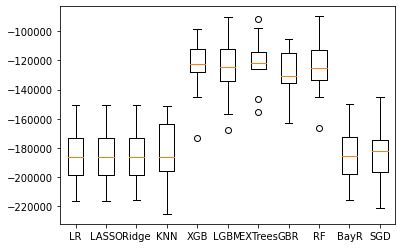

In [207]:
# build function to return score with different methods
from sklearn.model_selection import cross_val_score
def get_score(score_method):
    results = []
    names = []
    for name, model in models:
        cv_result = cross_val_score(model, x_train, y_train, cv=10, scoring=score_method)
        results.append(cv_result)
        names.append(name)
        print(score_method,'{}: {:.5f}({:.5f})'.format(name, cv_result.mean(), cv_result.std()))
    # also plot the result
    plt.boxplot(results)
    plt.xticks(range(1, len(names)+1), names)
    plt.show()
get_score('neg_mean_absolute_error')

### 8.2.2 RMSE

neg_root_mean_squared_error LR: -318246.08224(68640.54765)
neg_root_mean_squared_error LASSO: -318245.32047(68640.95421)
neg_root_mean_squared_error Ridge: -318199.83528(68684.84346)
neg_root_mean_squared_error KNN: -357377.66737(86571.80206)
neg_root_mean_squared_error XGB: -249295.36018(75339.77804)
neg_root_mean_squared_error LGBM: -255337.13889(82553.79354)
neg_root_mean_squared_error EXTrees: -245170.94327(64616.77433)
neg_root_mean_squared_error GBR: -239669.92466(57905.35580)
neg_root_mean_squared_error RF: -249661.88845(68060.92653)
neg_root_mean_squared_error BayR: -317982.77320(68997.21406)
neg_root_mean_squared_error SGD: -320986.04737(68171.12011)


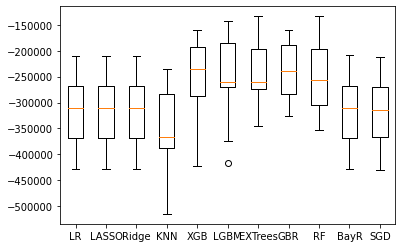

In [208]:
get_score('neg_root_mean_squared_error')

### 8.2.3 R2

r2 LR: 0.79531(0.04472)
r2 LASSO: 0.79531(0.04472)
r2 Ridge: 0.79539(0.04466)
r2 KNN: 0.74312(0.06348)
r2 XGB: 0.87417(0.04876)
r2 LGBM: 0.87145(0.04217)
r2 EXTrees: 0.87653(0.03930)
r2 GBR: 0.87954(0.04948)
r2 RF: 0.87412(0.05733)
r2 BayR: 0.79581(0.04440)
r2 SGD: 0.79077(0.04820)


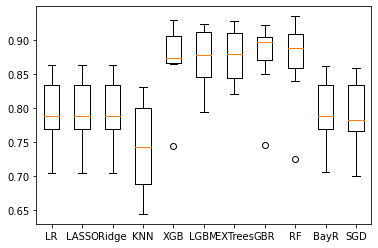

In [209]:
get_score('r2')

### 8.2.4 score table

In [210]:
# get score table to compare mae, rmse, r2
def score_table(score_method):
    results = []
    names = []
    for name, model in models:
        cv_result = cross_val_score(model, x_train, y_train, cv=10, scoring=score_method)
        results.append(cv_result.mean())
        names.append(name)
        score_df = pd.DataFrame(results,index=names,columns=[score_method])
    return score_df
full_table = pd.concat([score_table('neg_mean_absolute_error'),score_table('neg_root_mean_squared_error'),score_table('r2')],axis=1)

full_table['rank_mae']=full_table['neg_mean_absolute_error'].rank(method='max',ascending=0)
full_table['rank_rmse']=full_table['neg_root_mean_squared_error'].rank(method='max',ascending=0)
full_table['rank_r2']=full_table['r2'].rank(method='max',ascending=0)

full_table

,neg_mean_absolute_error,neg_root_mean_squared_error,r2,rank_mae,rank_rmse,rank_r2
LR,-185546.926396,-318246.082236,0.795311,10.0,9.0,9.0
LASSO,-185545.999655,-318245.320470,0.795313,9.0,8.0,8.0
Ridge,-185474.623031,-318199.835277,0.795395,8.0,7.0,7.0
KNN,-182651.176909,-357377.667369,0.743120,6.0,11.0,11.0
XGB,-124535.816271,-249295.360178,0.874171,2.0,3.0,4.0
LGBM,-126161.622599,-255337.138888,0.871451,4.0,5.0,5.0
EXTrees,-120589.571315,-248966.629651,0.874231,1.0,2.0,3.0
GBR,-130007.243453,-240353.183273,0.879953,5.0,1.0,1.0
RF,-125890.093846,-250853.279587,0.874470,3.0,4.0,2.0
BayR,-185073.407284,-317982.773198,0.795811,7.0,6.0,6.0


from above score table, it shows that 
<br>

`it looks like that EXTrees is best,then GBR,RF, KNN is always the worst,kind of little different from what got from lazyRegressor, therefore, fine-tune model will need`

# 9.Fine-tune model

## 9.1 random forest 

In [219]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': ['log2', 'sqrt'],
        'max_depth': randint(low=2, high=100)
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=100, cv=10, scoring='neg_root_mean_squared_error', random_state=42)
rnd_search.fit(x_train, y_train)


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x2cedd50d0>,
                                        'max_features': ['log2', 'sqrt'],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x2ced46370>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [220]:
rnd_search.best_estimator_

RandomForestRegressor(max_depth=53, max_features='log2', n_estimators=161,
                      random_state=42)

In [221]:
results=cross_val_score(rnd_search.best_estimator_, x_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
results.mean()

-275267.2250034022

## 9.2 XGBoost

In [211]:
import xgboost as xgb

xgb.set_config(verbosity=0)

params = {
    'n_estimators':[i for i in range(1,500)],
    'min_child_weight':[4,5], 
    'gamma':[i/10.0 for i in range(0,6)],  
    'subsample':[i/10.0 for i in range(6,11)],
    'colsample_bytree':[i/10.0 for i in range(6,11)], 
    'max_depth': [2,3,4,6,7],
    'objective': ['reg:squarederror', 'reg:tweedie'],
    'booster': ['gbtree', 'gblinear'],
    'eval_metric': ['rmse'],
    'eta': [i/10.0 for i in range(3,6)],
    'reg_lambda':[i for i in range(1,10)]
}

reg = XGBRegressor()

# run randomized search
n_iter_search = 100
xgb_random_search = RandomizedSearchCV(reg, param_distributions=params,
                                   n_iter=n_iter_search, cv=10,  scoring='neg_mean_squared_error',random_state=42)

xgb_random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,...
                                        'eval_metric': ['rmse'],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
                                        'max_depth': [2, 3, 4, 6, 7],
                                        'min_child_weight': [4, 5],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...],
                                        'objective': ['reg:squarederror',
                                                      'reg:tweedie'],
                                        'reg_lambda': [1, 2, 3, 4, 5, 6, 7, 8,
                                                       9],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error')

In [212]:
xgb_random_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False, eta=0.4,
             eval_metric='rmse', gamma=0.4, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.400000006, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=5,
             missing=nan, monotone_constraints='()', n_estimators=108, n_jobs=0,
             num_parallel_tree=1, objective='reg:tweedie', predictor='auto',
             random_state=0, ...)

In [213]:
results=cross_val_score(xgb_random_search.best_estimator_, x_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
results.mean()

-223845.0414334287

## 9.3 ExTrees

In [222]:
params = {
    'n_estimators':[i for i in range(1,500)],
    'max_depth':[i for i in range(1,200)], 
    'max_features':['sqrt', 'log2', 1.0],

}

extree_reg = ExtraTreesRegressor(random_state=42)

# run randomized search
n_iter_search = 100
extree_random_search = RandomizedSearchCV(extree_reg, param_distributions=params,
                                   n_iter=n_iter_search, cv=10,  scoring='neg_mean_squared_error',random_state=42)

extree_random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=ExtraTreesRegressor(random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'max_features': ['sqrt', 'log2', 1.0],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...]},
                   random_state=42, scoring='neg_mean_squared_error')

In [223]:
extree_random_search.best_estimator_

ExtraTreesRegressor(max_depth=25, n_estimators=140, random_state=42)

In [224]:
results=cross_val_score(extree_random_search.best_estimator_, x_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
results.mean()

-245567.44249839886

In [120]:
x_train.columns

Index(['maint_fee', 'avg_income_household_yr', 'total_sqft', 'price_per_sqft',
       'parking', 'age_of_building', 'commute_transit', 'commute_car',
       'near_by_schools', 'near_by_bars&restaurants', 'speak_English',
       'speak_Europe_language', 'speak_Africa_language', 'edu_no_diploma',
       'edu_trade_cert', 'edu_coll_or_univ_cert', 'population_35_49_years',
       'tenancy_property_type_semi_detached', 'tenancy_property_type_low_rise',
       'bedrooms_plus_field', 'East End', 'East York', 'Etobicoke',
       'Midtown | Central'],
      dtype='object')

## 9.4 GBR

In [242]:
params = {
    'n_estimators':[i for i in range(1,250)],
    'learning_rate':np.arange(0.01,0.4,0.05), 
    'max_depth':[i for i in range(1,100)], 
    'criterion':['friedman_mse', 'squared_error'],
    'alpha':np.arange(0.1,1.0,0.1),
    'subsample':np.arange(0.1,1.0,0.1),
}

gbr_reg = GradientBoostingRegressor()

# run randomized search
n_iter_search = 100
gbr_random_search = RandomizedSearchCV(gbr_reg, param_distributions=params,
                                   n_iter=n_iter_search, cv=10,  scoring='neg_mean_squared_error',random_state=42)

gbr_random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_iter=100,
                   param_distributions={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'criterion': ['friedman_mse',
                                                      'squared_error'],
                                        'learning_rate': array([0.01, 0.06, 0.11, 0.16, 0.21, 0.26, 0.31, 0.36]),
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...],
                                        'subsample': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
                   random_state=42, scoring='neg_mean_squared_error')

In [227]:
gbr_random_search.best_estimator_

GradientBoostingRegressor(alpha=0.4, criterion='squared_error',
                          learning_rate=0.11, max_depth=24, max_features='log2',
                          n_estimators=119, subsample=0.4)

In [243]:
results=cross_val_score(gbr_random_search.best_estimator_, x_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
results.mean()

-233358.56266896473

In [229]:
gbr=GradientBoostingRegressor(random_state=42)
gbr.fit(x_train,y_train)

GradientBoostingRegressor(random_state=42)

## 9.5 LGBM

In [230]:
params = {
    'n_estimators':[i for i in range(1,200)],
    'learning_rate':np.arange(0.01,0.4,0.05),
    'max_depth':[i for i in range(1,200)], 
    'n_jobs':[-1,0],
    'num_leaves':[i for i in range(1,200)]
}

lgbm_reg = LGBMRegressor(random_state=42)

# run randomized search
n_iter_search = 100
lgbm_random_search = RandomizedSearchCV(lgbm_reg, param_distributions=params,
                                   n_iter=n_iter_search, cv=10,  scoring='neg_mean_squared_error',random_state=42,verbose=-1)

lgbm_random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=LGBMRegressor(random_state=42), n_iter=100,
                   param_distributions={'learning_rate': array([0.01, 0.06, 0.11, 0.16, 0.21, 0.26, 0.31, 0.36]),
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...],
                                        'n_jobs': [-1, 0],
                                        'num_leaves': [1, 2, 3, 4, 5, 6, 7, 8,
                                                       9, 10, 11, 12, 13, 14,
                                                       15, 16, 17, 18, 19, 20,
                                                       21, 22, 23, 24, 25, 26,
                                                       27, 28, 29, 30, ...]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=-1)

In [231]:
lgbm_random_search.best_estimator_

LGBMRegressor(learning_rate=0.31000000000000005, max_depth=171, n_estimators=93,
              num_leaves=5, random_state=42)

In [232]:
results=cross_val_score(lgbm_random_search.best_estimator_, x_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
results.mean()

-248927.3998402249

## 9.6 Score table after fine-tune

In [214]:
xgb=xgb_random_search.best_estimator_

In [244]:
tune_models = []
xgb=xgb_random_search.best_estimator_
lgbm=lgbm_random_search.best_estimator_
etree = extree_random_search.best_estimator_
gbr = gbr_random_search.best_estimator_
rf = RandomForestRegressor() # tune close to original, and tune since deep depth, predict runs error nan
rf.fit(x_train,y_train)

tune_models.append(('XGB',xgb ))
tune_models.append(('LGBM', lgbm))
tune_models.append(('EXTrees',etree ))
tune_models.append(('GBR',gbr ))
tune_models.append(('RF',rf ))


In [245]:
# get score table to compare mae, rmse, r2
def score_table(score_method):
    results = []
    names = []
    for name, model in tune_models:
        cv_result = cross_val_score(model, x_train, y_train, cv=10, scoring=score_method)
        results.append(cv_result.mean())
        names.append(name)
        score_df = pd.DataFrame(results,index=names,columns=[score_method])
    return score_df
full_table_after = pd.concat([score_table('neg_mean_absolute_error'),score_table('neg_root_mean_squared_error'),score_table('r2')],axis=1)

full_table_after['rank_mae']=full_table_after['neg_mean_absolute_error'].rank(method='max',ascending=0)
full_table_after['rank_rmse']=full_table_after['neg_root_mean_squared_error'].rank(method='max',ascending=0)
full_table_after['rank_r2']=full_table_after['r2'].rank(method='max',ascending=0)

full_table_after

,neg_mean_absolute_error,neg_root_mean_squared_error,r2,rank_mae,rank_rmse,rank_r2
XGB,-123702.870674,-223845.041433,0.895071,3.0,1.0,1.0
LGBM,-130312.058506,-248927.399840,0.875821,5.0,4.0,4.0
EXTrees,-121267.262219,-245567.442498,0.878976,1.0,3.0,3.0
GBR,-122792.136482,-233441.233819,0.886057,2.0,2.0,2.0
RF,-126151.330659,-250688.190667,0.872008,4.0,5.0,5.0


`after fine-tune the models, from the perspective of RMSE and R2, the best model is XGB, and then GBR, Extrees,LBGM, the last one is rf`

# 10. Analyze the Best Models

In [215]:
feature_importances = xgb.feature_importances_
feature_importances

array([0.09694852, 0.03737124, 0.18882707, 0.3488737 , 0.05359576,
       0.00909428, 0.0720448 , 0.00815575, 0.04308108, 0.00801775,
       0.00742587, 0.021212  , 0.03655624, 0.00766047, 0.00807973,
       0.00978488, 0.01309976, 0.00892411, 0.00468334, 0.01137214,
       0.00519147, 0.        , 0.        ], dtype=float32)

<BarContainer object of 23 artists>

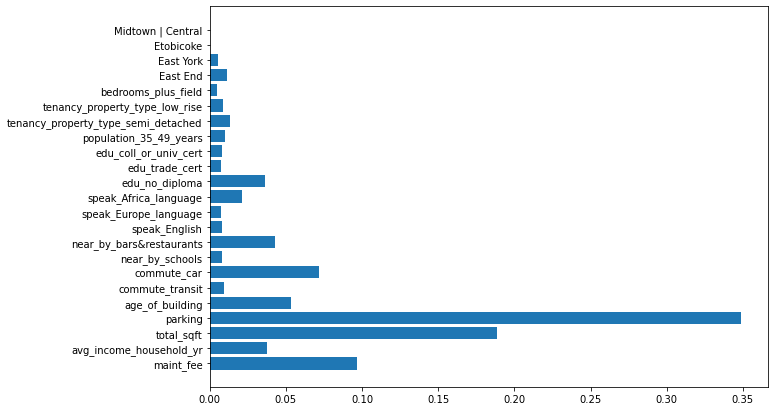

In [216]:
plt.figure(figsize=(10,7))
plt.barh(xgb.get_booster().feature_names, feature_importances)

# 11. Evaluate Your System on the Test Set

In [235]:
from sklearn.metrics import mean_squared_error

names=[]
all_rmse=[]
for name, final_model in tune_models:
    final_predictions = final_model.predict(x_test)
    final_mse = mean_squared_error(y_test, final_predictions)
    final_rmse = np.sqrt(final_mse)
    all_rmse.append(final_rmse)
    names.append(name)
    score_df = pd.DataFrame(all_rmse,index=names,columns=['RMSE'])
score_df

,RMSE
XGB,296918.189161
LGBM,365540.795500
EXTrees,342373.512907
GBR,333818.001225
RF,338097.072936


### z_score

In [236]:
from scipy import stats #in stats.t.inverval
def confidence_interval(final_model):
    final_predictions = final_model.predict(x_test)
    squared_errors = (final_predictions - y_test) **2
    confidence = 0.95
    m = len(squared_errors)
    mean = squared_errors.mean()
    zscore = stats.norm.ppf((1 + confidence) / 2) #(1+0.95)/2=97.5%
    zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m) #degrees of freedom correction in the calculation of the standard deviation. Default is 0.
    print(0,',',np.sqrt(mean + zmargin))
confidence_interval(xgb)
confidence_interval(lgbm)
confidence_interval(etree)
confidence_interval(gbr)
confidence_interval(rf)



0 , 356688.1853628988
0 , 469847.33097376395
0 , 439554.12954635604
0 , 423479.82232544525
0 , 439654.9006833903


In [237]:
for model in tune_models:
    print(model)

('XGB', XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False, eta=0.4,
             eval_metric='rmse', gamma=0.4, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.400000006, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=5,
             missing=nan, monotone_constraints='()', n_estimators=108, n_jobs=0,
             num_parallel_tree=1, objective='reg:tweedie', predictor='auto',
             random_state=0, ...))
('LGBM', LGBMRegressor(learning_rate=0.31000000000000005, max_depth=171, n_estimators=93,
              num_leaves=5, random_state=42))
('EXTrees', ExtraTreesRegressor(max_depth=25, n_estimators=140, random_state=42))
('GBR', GradientBoostingRegressor(alpha=0.4, criterion='squared_error',

### prediction and true value plot under xgb

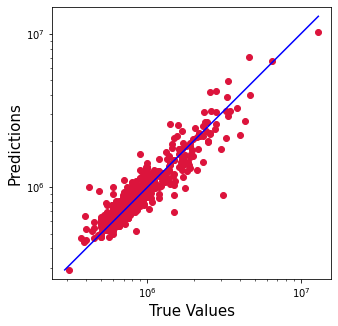

In [217]:
y_predictions=xgb.predict(x_test)
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_predictions, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_predictions), max(y_test))
p2 = min(min(y_predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [390]:
raw_instances=np.array([[7.1001e+02, 9.9562e+04, 7.4900e+02, 1.0690e+03, 1.0000e+00,
        1.9000e+01, 4.8000e+01, 4.3000e+01, 2.0000e+00, 9.1000e+01,
        3.4000e+01, 1.0000e+01, 0.0000e+00, 3.0000e+00, 1.0000e+00,
        1.5000e+01, 2.6000e+01, 0.0000e+00, 1.4000e+01, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]]).astype(np.float64)
raw_instances


array([[7.1001e+02, 9.9562e+04, 7.4900e+02, 1.0690e+03, 1.0000e+00,
        1.9000e+01, 4.8000e+01, 4.3000e+01, 2.0000e+00, 9.1000e+01,
        3.4000e+01, 1.0000e+01, 0.0000e+00, 3.0000e+00, 1.0000e+00,
        1.5000e+01, 2.6000e+01, 0.0000e+00, 1.4000e+01, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]])

In [304]:
df_num.age_of_building.std()
df_test=df.drop(['index','street','toronto_region','brokerages','single_condo_url'],axis=1)

15.170373938291638

In [345]:
df_test1=df_test.drop(['avg_income_individual_yr','bedrooms','bath','near_by_grocery_stores','speak_Asian_language','speak_middleEast_language','edu_high_school','edu_ba_or_msc_cert', 'population_0_14_years', 'population_15_19_years',
       'population_20_34_years','population_50_64_years', 'population_65_and_more',
       'tenancy_property_type_owned', 'tenancy_property_type_rented',
       'tenancy_property_type_detached','tenancy_property_type_duplex','tenancy_property_type_high_rise', 'household_compo_singlefamily',
       'household_compo_multifamily', 'household_compo_singleperson',
       'household_compo_multiperson', 'latitude', 'longitude',],axis=1)
df_test1.shape

(2513, 20)

In [355]:
test_region=pd.DataFrame(housing_cat_1hot,columns=cat_encoder.categories_[0].tolist(),index=df_num.index)
test_df=pd.concat([df_test1,test_region],axis=1)
test_df.shape

(2513, 29)

In [359]:
test_df1= test_df.drop(['Downtown', 'North York', 'Scarborough', 'West End',
       'York Crosstown'],axis=1)
test_df1.shape

(2513, 24)

In [391]:
scaler = StandardScaler()
X_train_Test = scaler.fit_transform(test_df1)
scaled_instances = scaler.transform(raw_instances)
scaled_instances

array([[-0.06547686, -0.1750609 , -0.44369283,  0.13057747, -0.34086816,
         0.222093  ,  1.36221485,  0.02988995,  0.79083151,  0.71683617,
        -1.09076628,  0.10439169, -0.14769652, -0.99868969, -1.29419004,
        -1.08945584,  1.52614266, -0.45784022,  0.40033666, -0.80410062,
        -0.11884567, -0.08493779, -0.39690187, -0.28025127]])

In [114]:
# input=np.array([[-0.06547686, -0.1750609 , -0.44369283,  0.13057747, -0.34086816,
#          0.222093  ,  1.36221485,  0.02988995,  0.79083151,  0.71683617,
#         -1.09076628,  0.10439169, -0.14769652, -0.99868969, -1.29419004,
#         -1.08945584,  1.52614266, -0.45784022,  0.40033666, -0.80410062,
#         -0.11884567, -0.08493779, -0.39690187, -0.28025127]]).astype(np.float64)
# xgb.predict(input)

array([794851.7], dtype=float32)

In [115]:
# input=np.array([[ 0.62906675, -0.88270611,  0.27061011, -1.34346636,  2.14203525,
#          1.27699016, -1.52810125,  1.68073496, -0.78518719, -0.14731193,
#         -2.28122714, -0.99632013, -0.14769652,  0.89426817,  0.76292544,
#          0.38446207, -0.97561631, -0.27181718, -0.67405735,  1.15965532,
#         -0.11884567, -0.08493779, -0.39690187, -0.28025127]]).astype(np.float64)
# xgb.predict(input)

array([674203.7], dtype=float32)

In [378]:
# test_df1.iloc[[2057]].values

array([[6.36080e+02, 1.06616e+05, 8.82000e+02, 1.11100e+03, 1.00000e+00,
        1.00000e+00, 3.20000e+01, 2.80000e+01, 0.00000e+00, 9.70000e+01,
        7.30000e+01, 6.00000e+00, 0.00000e+00, 1.10000e+01, 3.00000e+00,
        2.10000e+01, 2.70000e+01, 1.00000e+00, 1.10000e+01, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00]])

# streamlit pickle file

In [218]:
xgb.save_model('xgb.json')

In [117]:
import pickle
# open a file, where you ant to store the data
file = open('xgb1.pkl', 'wb')
# dump information to that file
pickle.dump(xgb, file)
file.close()

In [403]:
# open a file, where you ant to store the data
file = open('lgbm.pkl', 'wb')
# dump information to that file
pickle.dump(lgbm, file)
file.close()

In [404]:
# open a file, where you ant to store the data
file = open('rf.pkl', 'wb')
# dump information to that file
pickle.dump(rf, file)
file.close()

In [405]:
# open a file, where you ant to store the data
file = open('gbr.pkl', 'wb')
# dump information to that file
pickle.dump(gbr, file)
file.close()

In [406]:
# open a file, where you ant to store the data
file = open('etree.pkl', 'wb')
# dump information to that file
pickle.dump(etree, file)
file.close()

In [ ]:
df=df.reset_index(drop=True)

In [ ]:
import os
os.makedirs('/Users/xiaoxuchen/Downloads/DS_interview/DS_project/Python_scrap',exist_ok=True)
df.to_csv('/Users/xiaoxuchen/Downloads/DS_interview/DS_project/Python_scrap/clean_dataset_training.csv')